In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import seaborn as sns


In [2]:
data  = Table.read("../data/zall-pix-fuji-with-Z2.fits")

In [3]:
for i, item in enumerate(data):
    print(item['TARGETID'], item['TARGET_RA'], item['TARGET_DEC'])

39627739975650522 212.66583031324066 -1.9797335921276513
39627739984037995 213.08353848254941 -2.0488845476208954
39627746023835740 213.08728538096463 -1.6512371341181968
39627751514179323 180.34839323518477 -1.4339502299322366
39627752084603091 214.25806297424575 -1.3764013572706277
39627758095043132 212.62164037472712 -1.2323663497336337
39627758120210529 214.1940991298348 -1.3037046917508608
39627763556027388 178.14262914416574 -0.8989962983254879
39627764218730169 217.7445149520833 -0.8751162414836301
39627764227117679 218.1776660389839 -0.9120938048605941
39627769667130650 182.47691514859707 -0.792376107391528
39627769683903408 183.2837948504724 -0.6586742151821299
39627769700683481 184.39027407541099 -0.7632966273739082
39627770153668443 211.44145285485953 -0.7928531166125804
39627770183025813 213.0478852293071 -0.8684149337949184
39627770187224685 213.46943227436333 -0.767109895931037
39627770245941822 216.8688383180408 -0.7905707166705541
39627770313048831 220.7799018973188 -0.

In [4]:
marks = pd.read_table('../data/decals_viewer_marks.txt', delimiter="\t")

In [5]:
for index, row in marks.iterrows(): 
    if row['PAIR']==True:
        print(row['TARGETID'], row['RA'], row['DEC'])

39627763556027388 178.14262914416574 -0.8989962983254879
39627764227117679 218.1776660389839 -0.912093804860594
39627770313048831 220.7799018973188 -0.6822771109279571
39627775727899030 183.6678322792954 -0.615536730417971
39627800419762984 215.27584501570823 0.4201296622346114
39627805348073734 149.22458193567255 0.7705044931021467
39627805931078103 183.7685096522901 0.7905779676421779
39627847656019051 150.98559028456563 2.4231703891317045
39627902949525723 210.7021166853538 4.647216871432314
39632976887154521 252.96347742841385 34.843708429476095
39632986768934058 250.99265068913027 35.354246008423985
39633145292654829 241.5771148970324 43.79705490126372
39633311965905283 243.16528873186448 54.25880358771489
39633458712022848 266.5580253506976 66.47784688087597


In [11]:
source_fit = Table.read("../data/fastspec-source.fits")
lens_fit = Table.read("../data/fastspec-lens.fits")

In [7]:
source_fit

TARGETID,SURVEY,PROGRAM,HEALPIX,Z,COEFF,RCHI2,RCHI2_CONT,RCHI2_PHOT,SNR_B,SNR_R,SNR_Z,SMOOTHCORR_B,SMOOTHCORR_R,SMOOTHCORR_Z,VDISP,VDISP_IVAR,AV,AGE,ZZSUN,LOGMSTAR,SFR,DN4000,DN4000_OBS,DN4000_IVAR,DN4000_MODEL,FLUX_SYNTH_G,FLUX_SYNTH_R,FLUX_SYNTH_Z,FLUX_SYNTH_SPECMODEL_G,FLUX_SYNTH_SPECMODEL_R,FLUX_SYNTH_SPECMODEL_Z,FLUX_SYNTH_PHOTMODEL_G,FLUX_SYNTH_PHOTMODEL_R,FLUX_SYNTH_PHOTMODEL_Z,FLUX_SYNTH_PHOTMODEL_W1,FLUX_SYNTH_PHOTMODEL_W2,FLUX_SYNTH_PHOTMODEL_W3,FLUX_SYNTH_PHOTMODEL_W4,ABSMAG10_DECAM_G,ABSMAG10_IVAR_DECAM_G,KCORR10_DECAM_G,ABSMAG10_DECAM_R,ABSMAG10_IVAR_DECAM_R,KCORR10_DECAM_R,ABSMAG10_DECAM_Z,ABSMAG10_IVAR_DECAM_Z,KCORR10_DECAM_Z,ABSMAG00_U,ABSMAG00_IVAR_U,KCORR00_U,ABSMAG00_B,ABSMAG00_IVAR_B,KCORR00_B,ABSMAG00_V,ABSMAG00_IVAR_V,KCORR00_V,ABSMAG01_SDSS_U,ABSMAG01_IVAR_SDSS_U,KCORR01_SDSS_U,ABSMAG01_SDSS_G,ABSMAG01_IVAR_SDSS_G,KCORR01_SDSS_G,ABSMAG01_SDSS_R,ABSMAG01_IVAR_SDSS_R,KCORR01_SDSS_R,ABSMAG01_SDSS_I,ABSMAG01_IVAR_SDSS_I,KCORR01_SDSS_I,ABSMAG01_SDSS_Z,ABSMAG01_IVAR_SDSS_Z,KCORR01_SDSS_Z,ABSMAG01_W1,ABSMAG01_IVAR_W1,KCORR01_W1,LOGLNU_1500,LOGLNU_2800,LOGL_1450,LOGL_1700,LOGL_3000,LOGL_5100,FLYA_1215_CONT,FOII_3727_CONT,FHBETA_CONT,FOIII_5007_CONT,FHALPHA_CONT,RCHI2_LINE,DELTA_LINECHI2,DELTA_LINENDOF,APERCORR,APERCORR_G,APERCORR_R,APERCORR_Z,NARROW_Z,NARROW_ZRMS,BROAD_Z,BROAD_ZRMS,UV_Z,UV_ZRMS,NARROW_SIGMA,NARROW_SIGMARMS,BROAD_SIGMA,BROAD_SIGMARMS,UV_SIGMA,UV_SIGMARMS,MGII_DOUBLET_RATIO,OII_DOUBLET_RATIO,SII_DOUBLET_RATIO,LYALPHA_MODELAMP,LYALPHA_AMP,LYALPHA_AMP_IVAR,LYALPHA_FLUX,LYALPHA_FLUX_IVAR,LYALPHA_BOXFLUX,LYALPHA_BOXFLUX_IVAR,LYALPHA_VSHIFT,LYALPHA_SIGMA,LYALPHA_CONT,LYALPHA_CONT_IVAR,LYALPHA_EW,LYALPHA_EW_IVAR,LYALPHA_FLUX_LIMIT,LYALPHA_EW_LIMIT,LYALPHA_CHI2,LYALPHA_NPIX,OI_1304_MODELAMP,OI_1304_AMP,OI_1304_AMP_IVAR,OI_1304_FLUX,OI_1304_FLUX_IVAR,OI_1304_BOXFLUX,OI_1304_BOXFLUX_IVAR,OI_1304_VSHIFT,OI_1304_SIGMA,OI_1304_CONT,OI_1304_CONT_IVAR,OI_1304_EW,OI_1304_EW_IVAR,OI_1304_FLUX_LIMIT,OI_1304_EW_LIMIT,OI_1304_CHI2,OI_1304_NPIX,SILIV_1396_MODELAMP,SILIV_1396_AMP,SILIV_1396_AMP_IVAR,SILIV_1396_FLUX,SILIV_1396_FLUX_IVAR,SILIV_1396_BOXFLUX,SILIV_1396_BOXFLUX_IVAR,SILIV_1396_VSHIFT,SILIV_1396_SIGMA,SILIV_1396_CONT,SILIV_1396_CONT_IVAR,SILIV_1396_EW,SILIV_1396_EW_IVAR,SILIV_1396_FLUX_LIMIT,SILIV_1396_EW_LIMIT,SILIV_1396_CHI2,SILIV_1396_NPIX,CIV_1549_MODELAMP,CIV_1549_AMP,CIV_1549_AMP_IVAR,CIV_1549_FLUX,CIV_1549_FLUX_IVAR,CIV_1549_BOXFLUX,CIV_1549_BOXFLUX_IVAR,CIV_1549_VSHIFT,CIV_1549_SIGMA,CIV_1549_CONT,CIV_1549_CONT_IVAR,CIV_1549_EW,CIV_1549_EW_IVAR,CIV_1549_FLUX_LIMIT,CIV_1549_EW_LIMIT,CIV_1549_CHI2,CIV_1549_NPIX,HEII_1640_MODELAMP,HEII_1640_AMP,HEII_1640_AMP_IVAR,HEII_1640_FLUX,HEII_1640_FLUX_IVAR,HEII_1640_BOXFLUX,HEII_1640_BOXFLUX_IVAR,HEII_1640_VSHIFT,HEII_1640_SIGMA,HEII_1640_CONT,HEII_1640_CONT_IVAR,HEII_1640_EW,HEII_1640_EW_IVAR,HEII_1640_FLUX_LIMIT,HEII_1640_EW_LIMIT,HEII_1640_CHI2,HEII_1640_NPIX,ALIII_1857_MODELAMP,ALIII_1857_AMP,ALIII_1857_AMP_IVAR,ALIII_1857_FLUX,ALIII_1857_FLUX_IVAR,ALIII_1857_BOXFLUX,ALIII_1857_BOXFLUX_IVAR,ALIII_1857_VSHIFT,ALIII_1857_SIGMA,ALIII_1857_CONT,ALIII_1857_CONT_IVAR,ALIII_1857_EW,ALIII_1857_EW_IVAR,ALIII_1857_FLUX_LIMIT,ALIII_1857_EW_LIMIT,ALIII_1857_CHI2,ALIII_1857_NPIX,SILIII_1892_MODELAMP,SILIII_1892_AMP,SILIII_1892_AMP_IVAR,SILIII_1892_FLUX,SILIII_1892_FLUX_IVAR,SILIII_1892_BOXFLUX,SILIII_1892_BOXFLUX_IVAR,SILIII_1892_VSHIFT,SILIII_1892_SIGMA,SILIII_1892_CONT,SILIII_1892_CONT_IVAR,SILIII_1892_EW,SILIII_1892_EW_IVAR,SILIII_1892_FLUX_LIMIT,SILIII_1892_EW_LIMIT,SILIII_1892_CHI2,SILIII_1892_NPIX,CIII_1908_MODELAMP,CIII_1908_AMP,CIII_1908_AMP_IVAR,CIII_1908_FLUX,CIII_1908_FLUX_IVAR,CIII_1908_BOXFLUX,CIII_1908_BOXFLUX_IVAR,CIII_1908_VSHIFT,CIII_1908_SIGMA,CIII_1908_CONT,CIII_1908_CONT_IVAR,CIII_1908_EW,CIII_1908_EW_IVAR,CIII_1908_FLUX_LIMIT,CIII_1908_EW_LIMIT,CIII_1908_CHI2,CIII_1908_NPIX,MGII_2796_MODELAMP,MGII_2796_AMP,MGII_2796_AMP_IVAR,MGII_2796_FLUX,MGII_2796_FLUX_IVAR,MGII_2796_BOXFLUX,MGII_2796_BOXFLUX_IVAR,MGII_2796_VSHIFT,MGII_2796_SIGMA,MGII_2796_CONT,MG

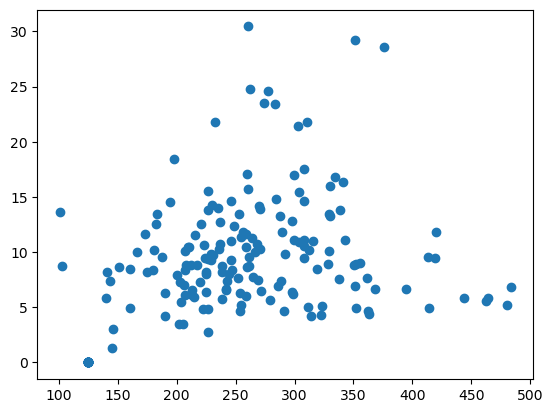

In [12]:
plt.scatter(lens_fit['VDISP'], lens_fit['VDISP']*np.sqrt(lens_fit['VDISP_IVAR']))

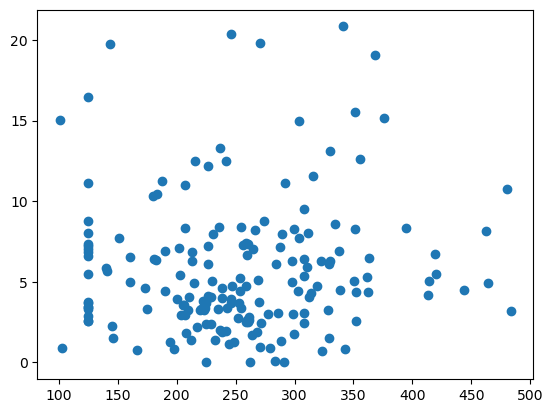

In [13]:
plt.scatter(lens_fit['VDISP'], source_fit['OII_3729_FLUX'])

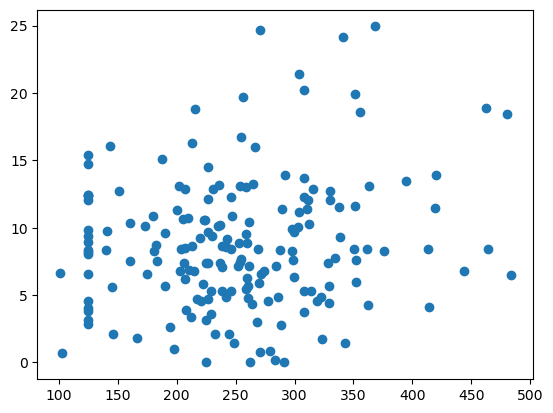

In [14]:
plt.scatter(lens_fit['VDISP'], source_fit['OII_3729_FLUX']*np.sqrt(source_fit['OII_3729_FLUX_IVAR']))

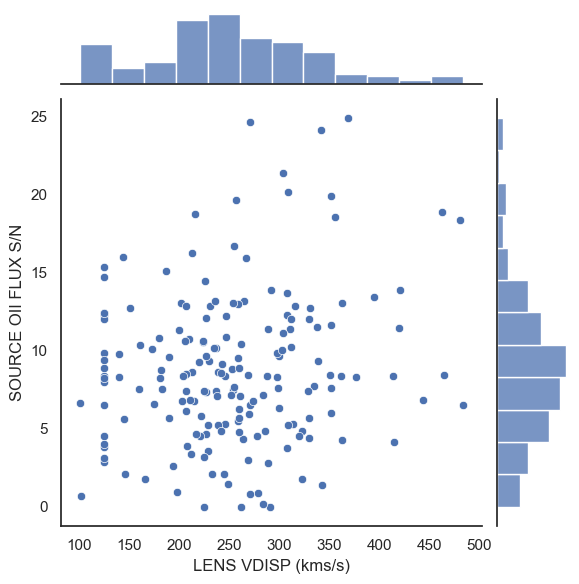

In [24]:
lens_VDISP = lens_fit['VDISP'].astype(np.float64).newbyteorder('<')
source_OII_FLUX = (source_fit['OII_3729_FLUX']*np.sqrt(source_fit['OII_3729_FLUX_IVAR'])).astype(np.float64).newbyteorder('<')

# Scatter plot
g = sns.jointplot(x=lens_VDISP , y=source_OII_FLUX)
g.set_axis_labels("LENS VDISP (kms/s)", "SOURCE OII FLUX S/N")
